In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import os

# Gathering Data

## csv reading

In [3]:
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')
tw_archive.sort_values('timestamp')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


## Getting URL

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t' )

## Twitter API

In [5]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,  
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [6]:
tweet_ids = tw_archive.tweet_id.values
len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass

print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

KeyboardInterrupt: 

In [7]:
json_list = []
with open('tweet-json.txt', encoding='utf-8') as file:  
    data = [json.loads(line) for line in file]
    for info in data:
        tweet_id = info['id']
        favorite_count = info['favorite_count']
        retweet_count = info['retweet_count']
        followers_count = info['user']['followers_count']
        friends_count = info['user']['friends_count']
        

        json_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                            })
        tweet_json = pd.DataFrame(json_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count'])

# Assessing Data

## visual assesing

In [8]:
tw_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count
0,892420643555336193,39467,8853,3200889,104
1,892177421306343426,33819,6514,3200889,104
2,891815181378084864,25461,4328,3200889,104
3,891689557279858688,42908,8964,3200889,104
4,891327558926688256,41048,9774,3200889,104
5,891087950875897856,20562,3261,3200889,104
6,890971913173991426,12041,2158,3200889,104
7,890729181411237888,56848,16716,3200889,104
8,890609185150312448,28226,4429,3200889,104
9,890240255349198849,32467,7711,3200889,104


In [10]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


# programmatic assessing

In [11]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
tw_archive.sample(12)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1482,693267061318012928,NaN,NaN,2016-01-30 02:58:42 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oscar. He can wave. Friendly af. 12/10...,NaN,NaN,NaN,https://vine.co/v/i5n2irFUYWv,12,10,Oscar,None,None,None,None
798,772877495989305348,NaN,NaN,2016-09-05 19:22:09 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",You need to watch these two doggos argue throu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772877495...,11,10,None,None,None,None,None
1163,723673163800948736,NaN,NaN,2016-04-23 00:41:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ivar. She is a badass Viking warrior. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/723673163...,10,10,Ivar,None,None,None,None
598,798686750113755136,NaN,NaN,2016-11-16 00:38:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Say hello to Jack (pronounced ""...",6.833919e+17,4.196984e+09,2016-01-02 20:58:09 +0000,https://twitter.com/dog_rates/status/683391852...,11,10,Jack,None,None,None,None
1913,674372068062928900,NaN,NaN,2015-12-08 23:36:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chesney. On the outside he stays calm &am...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674372068...,10,10,Chesney,None,None,None,None
1239,712092745624633345,NaN,NaN,2016-03-22 01:45:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He's inverted af. Also very he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712092745...,7,10,Steven,None,None,None,None
63,879862464715927552,NaN,NaN,2017-06-28 00:42:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Romeo. He would like to do an entrance...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879862464...,13,10,Romeo,None,None,None,None
2129,670290420111441920,NaN,NaN,2015-11-27 17:17:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandra. She's going skydiving. Nice ad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670290420...,11,10,Sandra,None,None,None,None
2214,668544745690562560,NaN,NaN,2015-11-22 21:41:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",It is an honor to rate this pup. He is a Snork...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668544745...,10,10,None,None,None,None,None
1880,675006312288268288,NaN,NaN,2015-12-10 17:37:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mollie. This pic was taken after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675006312...,10,10,Mollie,None,None,pupper,None


In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions.sample(12)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1221,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
1612,801538201127157760,https://pbs.twimg.com/media/Cx-itFWWIAAZu7l.jpg,1,Pembroke,0.550506,True,Cardigan,0.306612,True,Shetland_sheepdog,0.054230,True
1152,732585889486888962,https://pbs.twimg.com/media/Ciqq-VFUUAANlWm.jpg,2,Staffordshire_bullterrier,0.843359,True,American_Staffordshire_terrier,0.028290,True,miniature_pinscher,0.016793,True
1965,867421006826221569,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1,Eskimo_dog,0.616457,True,Siberian_husky,0.381330,True,malamute,0.001670,True
1276,750071704093859840,https://pbs.twimg.com/media/CmjKOzVWcAAQN6w.jpg,2,redbone,0.382113,True,malinois,0.249943,True,miniature_pinscher,0.070926,True
404,673705679337693185,https://pbs.twimg.com/media/CVl7u00WcAAufzR.jpg,1,Shih-Tzu,0.165383,True,Lhasa,0.116977,True,Yorkshire_terrier,0.063899,True
1162,734912297295085568,https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg,1,Maltese_dog,0.847292,True,feather_boa,0.059379,False,Old_English_sheepdog,0.052758,True
931,703079050210877440,https://pbs.twimg.com/media/CcHWqQCW8AEb0ZH.jpg,2,Pembroke,0.778503,True,Shetland_sheepdog,0.093834,True,Cardigan,0.060296,True
1017,709918798883774466,https://pbs.twimg.com/media/CdojYQmW8AApv4h.jpg,2,Pembroke,0.956222,True,Cardigan,0.020727,True,Chihuahua,0.007912,True
215,670055038660800512,https://pbs.twimg.com/media/CUyDgChWUAAmNSI.jpg,1,snail,0.563631,False,slug,0.296649,False,bolete,0.031839,False


In [16]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id           2354 non-null object
favorite_count     2354 non-null int64
retweet_count      2354 non-null int64
followers_count    2354 non-null int64
friends_count      2354 non-null int64
dtypes: int64(4), object(1)
memory usage: 92.0+ KB


In [17]:
tweet_json.sample(12)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count
145,863471782782697472,0,2687,3200891,104
278,839990271299457024,14640,2597,3200891,104
1867,675153376133427200,6072,2734,3201003,104
1803,676942428000112642,2261,855,3201001,104
335,832636094638288896,17379,3220,3200892,104
997,748220828303695873,15549,8825,3200943,104
272,840728873075638272,0,18285,3200891,104
2188,668960084974809088,757,263,3201014,104
2219,668480044826800133,491,162,3201015,104
1075,739544079319588864,43694,24319,3200943,104


In [18]:
tw_archive[tw_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [19]:
sum(tw_archive['tweet_id'].isnull())

0

In [20]:
sum(image_predictions.tweet_id.duplicated())

0

In [21]:
sum(image_predictions.jpg_url.duplicated())

66

In [22]:

image_predictions[image_predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [23]:
tw_archive[tw_archive['name'].isnull()]
sum(tw_archive['name'].isnull())
sd = tw_archive[tw_archive['tweet_id'] == 891087950875897856]
sd['text']

5    Here we have a majestic great white breaching ...
Name: text, dtype: object

### quality defects


#### 1 - 66 duplicated img url
#### 2 - retweets  should be deleted
#### 3 - retweeted_status_id should be deleted
#### 4 - tweet with id 891087950875897856 has name "None" for dog must be replaced by Tucker Marlo
#### 5 - change all 'p' to 'prediction'
#### 6 - in_reply_to_status_id should be deleted
#### 7  - in_reply_to_user_id should be deleted
#### 8 - retweeted_status_user_id should be deleted
#### 9 - in rating_numerator there are too high values
#### 10 - in rating_denominator there are too high values


### tidiness defects

#### 1 - all tables must be in 1 table
#### 2 - rating_numerator and rating_denominator must be in 1 column as a percentage (numerator / denominator *100)

# Cleaning Data

In [24]:
cleaned_archive = tw_archive

cleaned_archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### define
#### rename the dog Tucker Marlo from "None"

### code

In [25]:
# change the value of name with the tweet id 891087950875897856
cleaned_archive.loc[cleaned_archive['tweet_id'] == 891087950875897856,'name'] = 'Tucker Marlo'

### test

In [26]:
cleaned_archive[cleaned_archive['tweet_id'] == 891087950875897856]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,Tucker Marlo,None,None,None,None


### define
#### exclude any rating_numinator or rating_domenator greater than 10

### code

In [27]:
cleaned_archive = cleaned_archive[cleaned_archive['rating_numerator'] <= 10]
cleaned_archive = cleaned_archive[cleaned_archive['rating_denominator'] <= 10]

### test

In [28]:
cleaned_archive['rating_denominator'].max()
cleaned_archive['rating_numerator'].max()

10

### define
#### removing all retweets and keep only original tweets

### code

In [29]:
#keep only the rows with retweeted_status_user_id value = null
cleaned_archive = cleaned_archive[pd.isnull(cleaned_archive['retweeted_status_user_id'])]

### test

In [30]:
sum(cleaned_archive['retweeted_status_user_id'].isnull())
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 45 to 2355
Data columns (total 17 columns):
tweet_id                      869 non-null int64
in_reply_to_status_id         17 non-null float64
in_reply_to_user_id           17 non-null float64
timestamp                     869 non-null object
source                        869 non-null object
text                          869 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 854 non-null object
rating_numerator              869 non-null int64
rating_denominator            869 non-null int64
name                          869 non-null object
doggo                         869 non-null object
floofer                       869 non-null object
pupper                        869 non-null object
puppo                         869 non-null object
dtypes: float64(4), int64(3), object(10)
memory us

### define
#### remove the 4 columns retweeted_status_user_id and retweeted_status_id and in_reply_to_user_id and in_reply_to_status_id

### code

In [31]:
del cleaned_archive['in_reply_to_status_id']
del cleaned_archive['in_reply_to_user_id']
del cleaned_archive['retweeted_status_user_id']
del cleaned_archive['retweeted_status_id']

### test

In [32]:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 45 to 2355
Data columns (total 13 columns):
tweet_id                      869 non-null int64
timestamp                     869 non-null object
source                        869 non-null object
text                          869 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 854 non-null object
rating_numerator              869 non-null int64
rating_denominator            869 non-null int64
name                          869 non-null object
doggo                         869 non-null object
floofer                       869 non-null object
pupper                        869 non-null object
puppo                         869 non-null object
dtypes: int64(3), object(10)
memory usage: 95.0+ KB


### define
#### creating rating_percentage column which equals (rating_numerator/rating_denominator) * 100, then delete rating_denominator and rating_numerator

### code

In [33]:

cleaned_archive['rating_percentage'] = cleaned_archive['rating_numerator'] / cleaned_archive['rating_denominator']
cleaned_archive['rating_percentage'] = cleaned_archive['rating_percentage'] * 100
del cleaned_archive['rating_denominator']
del cleaned_archive['rating_numerator']

### Test

In [34]:
cleaned_archive.head()

,tweet_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating_percentage
45,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,https://twitter.com/dog_rates/status/883482846...,Bella,None,None,None,None,50.0
113,870726314365509632,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,None,None,None,None,None,100.0
229,848212111729840128,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,https://twitter.com/dog_rates/status/848212111...,Jerry,None,None,None,None,60.0
232,847962785489326080,2017-04-01 00:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,NaN,https://twitter.com/dog_rates/status/847962785...,Georgie,None,None,None,None,100.0
274,840698636975636481,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,NaN,None,None,None,None,None,100.0


In [35]:
cleaned_predictions = image_predictions
cleaned_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### define
#### rename columns p1 and p2 and p3

### code

In [36]:
cleaned_predictions.rename(columns = {'p1':'predictionn 1'}, inplace = True) 
cleaned_predictions.rename(columns = {'p2':'predictionn 2'}, inplace = True)
cleaned_predictions.rename(columns = {'p3':'predictionn 3'}, inplace = True)

### Test

In [37]:
cleaned_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id         2075 non-null int64
jpg_url          2075 non-null object
img_num          2075 non-null int64
predictionn 1    2075 non-null object
p1_conf          2075 non-null float64
p1_dog           2075 non-null bool
predictionn 2    2075 non-null object
p2_conf          2075 non-null float64
p2_dog           2075 non-null bool
predictionn 3    2075 non-null object
p3_conf          2075 non-null float64
p3_dog           2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### define
#### drop dupplicated jpg_url

### code

In [38]:


cleaned_predictions.drop_duplicates(subset ="jpg_url", 
                     keep = False, inplace = True)


### test

In [39]:
sum(image_predictions.jpg_url.duplicated())

0

### define
#### change tweet_id to int64

### code

In [40]:
tweet_status = tweet_json
tweet_status['tweet_id']=tweet_status['tweet_id'].astype('int64')


In [41]:
#test
tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id           2354 non-null int64
favorite_count     2354 non-null int64
retweet_count      2354 non-null int64
followers_count    2354 non-null int64
friends_count      2354 non-null int64
dtypes: int64(5)
memory usage: 92.0 KB


### define
#### megring the tables together

### code

In [42]:
merge = pd.merge(cleaned_archive, cleaned_predictions, how='outer', on=['tweet_id'])

In [43]:
merge = pd.merge(merge, tweet_status, how='outer', on=['tweet_id'])

In [44]:
#test
merge.head()

,tweet_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,...,predictionn 2,p2_conf,p2_dog,predictionn 3,p3_conf,p3_dog,favorite_count,retweet_count,followers_count,friends_count
0,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,https://twitter.com/dog_rates/status/883482846...,Bella,None,None,None,...,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,46860.0,10407.0,3200890.0,104.0
1,870726314365509632,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,121.0,3.0,3200891.0,104.0
2,848212111729840128,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,https://twitter.com/dog_rates/status/848212111...,Jerry,None,None,None,...,Ibizan_hound,0.245797,True,wallaby,0.131647,False,17618.0,3444.0,3200891.0,104.0
3,847962785489326080,2017-04-01 00:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,NaN,https://twitter.com/dog_rates/status/847962785...,Georgie,None,None,None,...,mink,0.066880,False,otter,0.025679,False,25296.0,5730.0,3200891.0,104.0
4,840698636975636481,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,NaN,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,197.0,3.0,3200891.0,104.0


In [45]:
merge.to_csv('twitter_archive_master.csv')

In [59]:
merge.head()
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2354
Data columns (total 27 columns):
tweet_id                      2355 non-null int64
timestamp                     869 non-null object
source                        869 non-null object
text                          869 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 854 non-null object
name                          869 non-null object
doggo                         869 non-null object
floofer                       869 non-null object
pupper                        869 non-null object
puppo                         869 non-null object
rating_percentage             869 non-null float64
jpg_url                       1943 non-null object
img_num                       1943 non-null float64
predictionn 1                 1943 non-null object
p1_conf                       1943 non-null float64
p1_dog                        1943 non-null object
predictionn 2                 1943 no

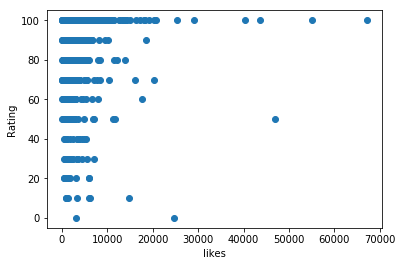

In [55]:
plt.scatter('favorite_count', 'rating_percentage',  data=merge)
plt.xlabel('likes')
plt.ylabel('Rating')
plt.show()


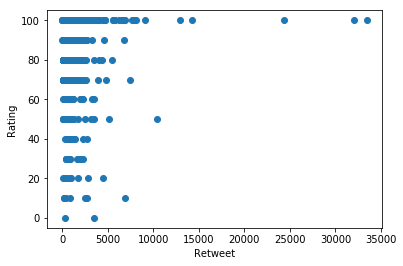

In [95]:
plt.scatter('retweet_count', 'rating_percentage',  data=merge)
plt.xlabel('Retweet')
plt.ylabel('Rating')
plt.show()


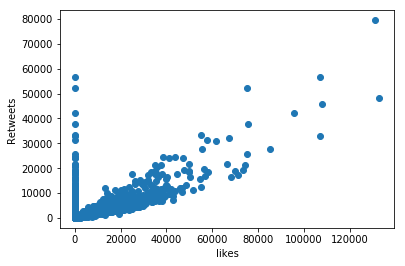

In [58]:
plt.scatter('favorite_count', 'retweet_count',  data=merge)
plt.xlabel('likes')
plt.ylabel('Retweets')
plt.show()


# The Insights

### 1 - There is no relationship between likes and rating
### 2 - there is positive relationship between likes and retweets
### 3 - there is no relationship between retweets and rating